# **India_GDP_1960-2022**

### **About this file**

Year= its Showing year of Indian GDP
GDP ( Billions of US $) = its showing GDP ( Billions of US $) per year
Per Capita= in this column per capita in rupees
Growth= showing changes in every year in %

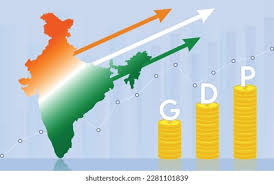

# **Introduction**

* The dataset contains GDP data for India from 1960 to 2022.

* Key columns include:

  * Year: The year of GDP recording.

  * GDP (Billions of US $): India's GDP per year in billions.

  * Per Capita: GDP per capita in rupees.

  * Growth (%): Yearly GDP growth percentage.

we will analyze GDP trends and apply machine learning for future predictions.

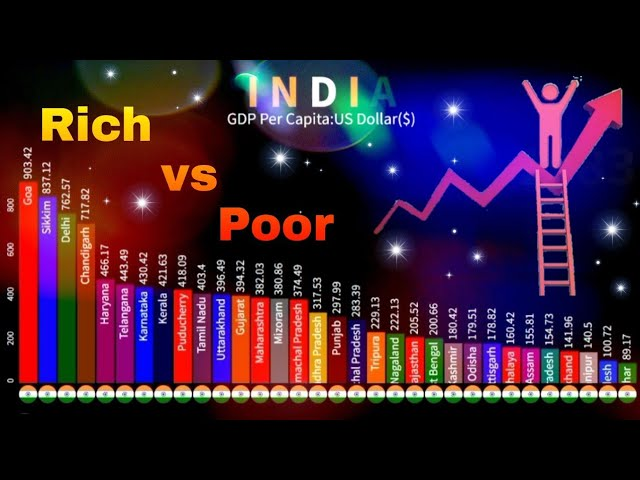

In [ ]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# **Data Loading and Exploration**

In [ ]:
# load dataset
df=pd.read_csv("/content/India_GDP_1960-2022.csv")
df.head(10)

,Unnamed: 0,India GDP - Historical Data,India GDP - Historical Data.1,India GDP - Historical Data.2,India GDP - Historical Data.3
0,NaN,Year,GDP in (Billion) $,Per Capita in rupees,Growth %
1,0.0,2021,3173.4,182160,8.95
2,1.0,2020,2667.69,154640,-6.6
3,2.0,2019,2831.55,165760,3.74
4,3.0,2018,2702.93,159840,6.45
5,4.0,2017,2651.47,158480,6.8
6,5.0,2016,2294.8,138640,8.26
7,6.0,2015,2103.59,128480,8
8,7.0,2014,2039.13,125920,7.41
9,8.0,2013,1856.72,116000,6.39


The dataset loaded into a Pandas DataFrame.

# EDA

In [ ]:
# droping unnecassary column and first row
df.drop(columns=['Unnamed: 0'],inplace=True)
df.drop(index=0,inplace=True)
df.head()

,India GDP - Historical Data,India GDP - Historical Data.1,India GDP - Historical Data.2,India GDP - Historical Data.3
1,2021,3173.4,182160,8.95
2,2020,2667.69,154640,-6.6
3,2019,2831.55,165760,3.74
4,2018,2702.93,159840,6.45
5,2017,2651.47,158480,6.8


In [ ]:
# get info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 1 to 62
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   India GDP - Historical Data    62 non-null     object
 1   India GDP - Historical Data.1  62 non-null     object
 2   India GDP - Historical Data.2  62 non-null     object
 3   India GDP - Historical Data.3  62 non-null     object
dtypes: object(4)
memory usage: 2.1+ KB


In [ ]:
# check is there any null value
df.isnull().sum()

,0
India GDP - Historical Data,0
India GDP - Historical Data.1,0
India GDP - Historical Data.2,0
India GDP - Historical Data.3,0


In [ ]:
# checking data types
df.dtypes

,0
India GDP - Historical Data,object
India GDP - Historical Data.1,object
India GDP - Historical Data.2,object
India GDP - Historical Data.3,object


In [ ]:
# converting their data type to float
df['India GDP - Historical Data']=df['India GDP - Historical Data'].astype('float64')
df['India GDP - Historical Data.1']=df['India GDP - Historical Data.1'].astype('float64')
df['India GDP - Historical Data.2']=df['India GDP - Historical Data.2'].astype('float64')
df['India GDP - Historical Data.3']=df['India GDP - Historical Data.3'].astype('float64')
df.dtypes

,0
India GDP - Historical Data,float64
India GDP - Historical Data.1,float64
India GDP - Historical Data.2,float64
India GDP - Historical Data.3,float64


In [ ]:
# rename columns
df.rename(columns={'India GDP - Historical Data': 'Year', 'India GDP - Historical Data.1': 'GDP in (Billion)$','India GDP - Historical Data.2':'Per Capita in rupees', 'India GDP - Historical Data.3':'Growth%'}, inplace=True)
df

,Year,GDP in (Billion)$,Per Capita in rupees,Growth%
1,2021.0,3173.40,182160.0,8.95
2,2020.0,2667.69,154640.0,-6.60
3,2019.0,2831.55,165760.0,3.74
4,2018.0,2702.93,159840.0,6.45
5,2017.0,2651.47,158480.0,6.80
...,...,...,...,...
58,1964.0,56.48,9280.0,7.45
59,1963.0,48.42,8080.0,5.99
60,1962.0,42.16,7200.0,2.93
61,1961.0,39.23,6800.0,3.72


In [ ]:
# getting statical values
df.describe()

,Year,GDP in (Billion)$,Per Capita in rupees,Growth%
count,62.000000,62.000000,62.000000,62.000000
mean,1990.500000,699.036452,48210.322581,5.007258
std,18.041619,867.228056,49386.668108,3.319231
min,1960.000000,37.030000,6560.000000,-6.600000
25%,1975.250000,100.327500,12920.000000,3.725000
50%,1990.500000,292.125000,27440.000000,5.620000
75%,2005.750000,910.290000,62720.000000,7.525000
max,2021.000000,3173.400000,182160.000000,9.630000


In [ ]:
# check if there is any duplicated
df.duplicated().any()

False

**We observed :**
* The first few rows are displayed to check the structure.

* Data types of each column are examined.

* Summary statistics (mean, median, standard deviation) are calculated.

* Missing values are checked and handled if any are found.

# **Data Visualization and Time Series Analysis**


# **1. GDP Trends Over Time**

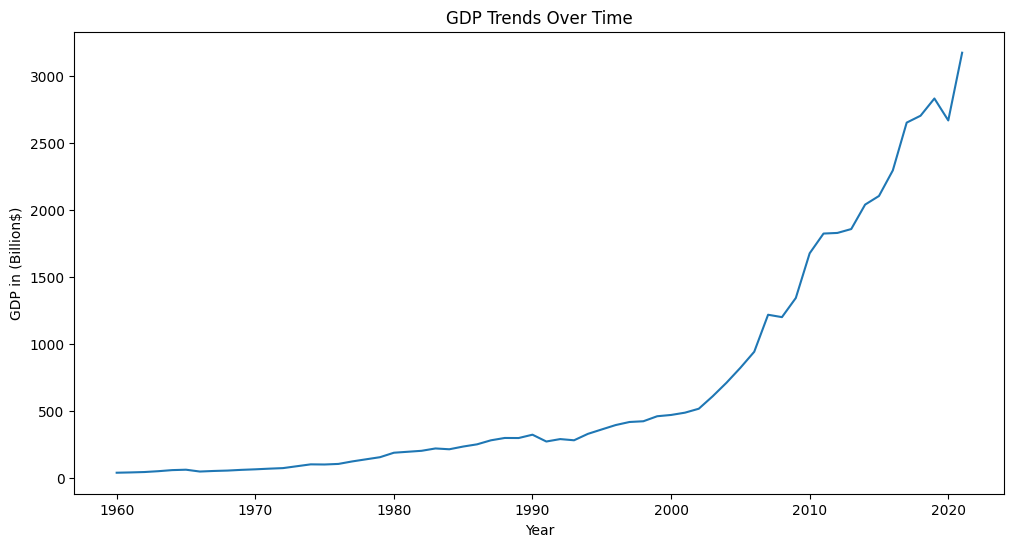

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

#  GDP Trends Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='GDP in (Billion)$')
plt.title('GDP Trends Over Time')
plt.xlabel('Year')
plt.ylabel('GDP in (Billion$)')
plt.show()


India's GDP has shown an overall increasing trend with fluctuations during economic downturns.

# **2. Growth Rate Fluctuations**

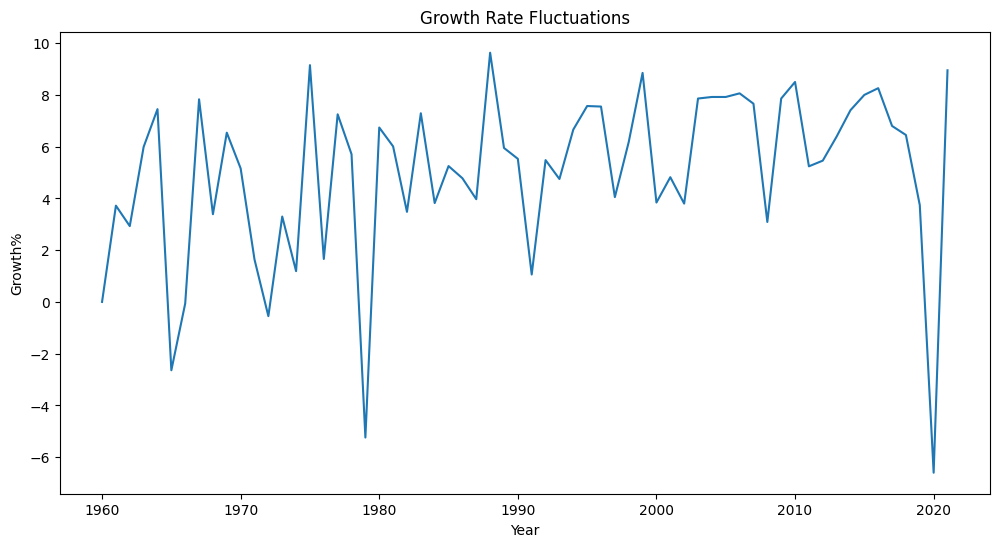

In [44]:
# Growth Rate Fluctuations
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='Growth%')
plt.title('Growth Rate Fluctuations')
plt.xlabel('Year')
plt.ylabel('Growth%')
plt.show()

<ipython-input-48-8b9d2b596cc1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Year'], y=df['Growth%'], palette='coolwarm')


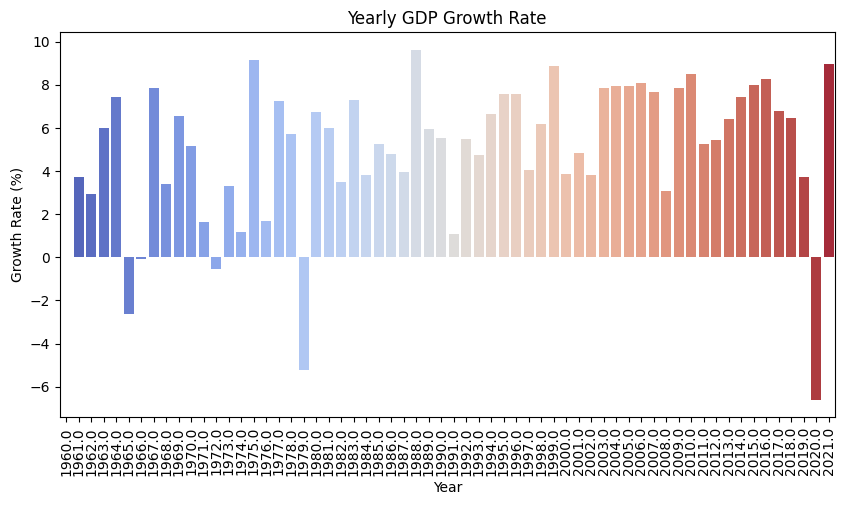

In [48]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['Year'], y=df['Growth%'], palette='coolwarm')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.title('Yearly GDP Growth Rate')
plt.xticks(rotation=90)
plt.show()

Significant dips in GDP growth correspond to global and local economic crises.

# **3. Correlation Between GDP and Per Capita Income**

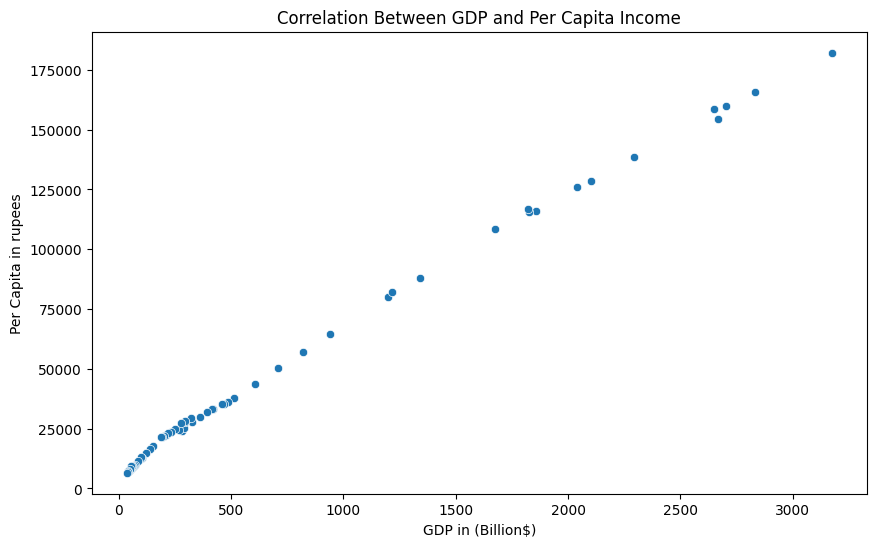

In [55]:
#  Correlation Between GDP and Per Capita Income
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='GDP in (Billion)$', y='Per Capita in rupees')
plt.title('Correlation Between GDP and Per Capita Income')
plt.xlabel('GDP in (Billion$)')
plt.ylabel('Per Capita in rupees')
plt.show()

A strong positive correlation exists between GDP and per capita income.

# **4. Time Series Analysis with Decomposition**

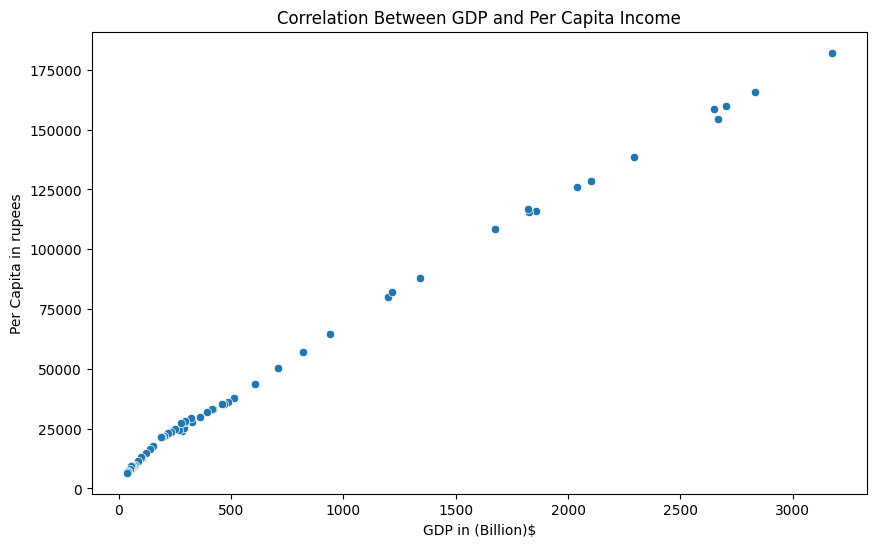

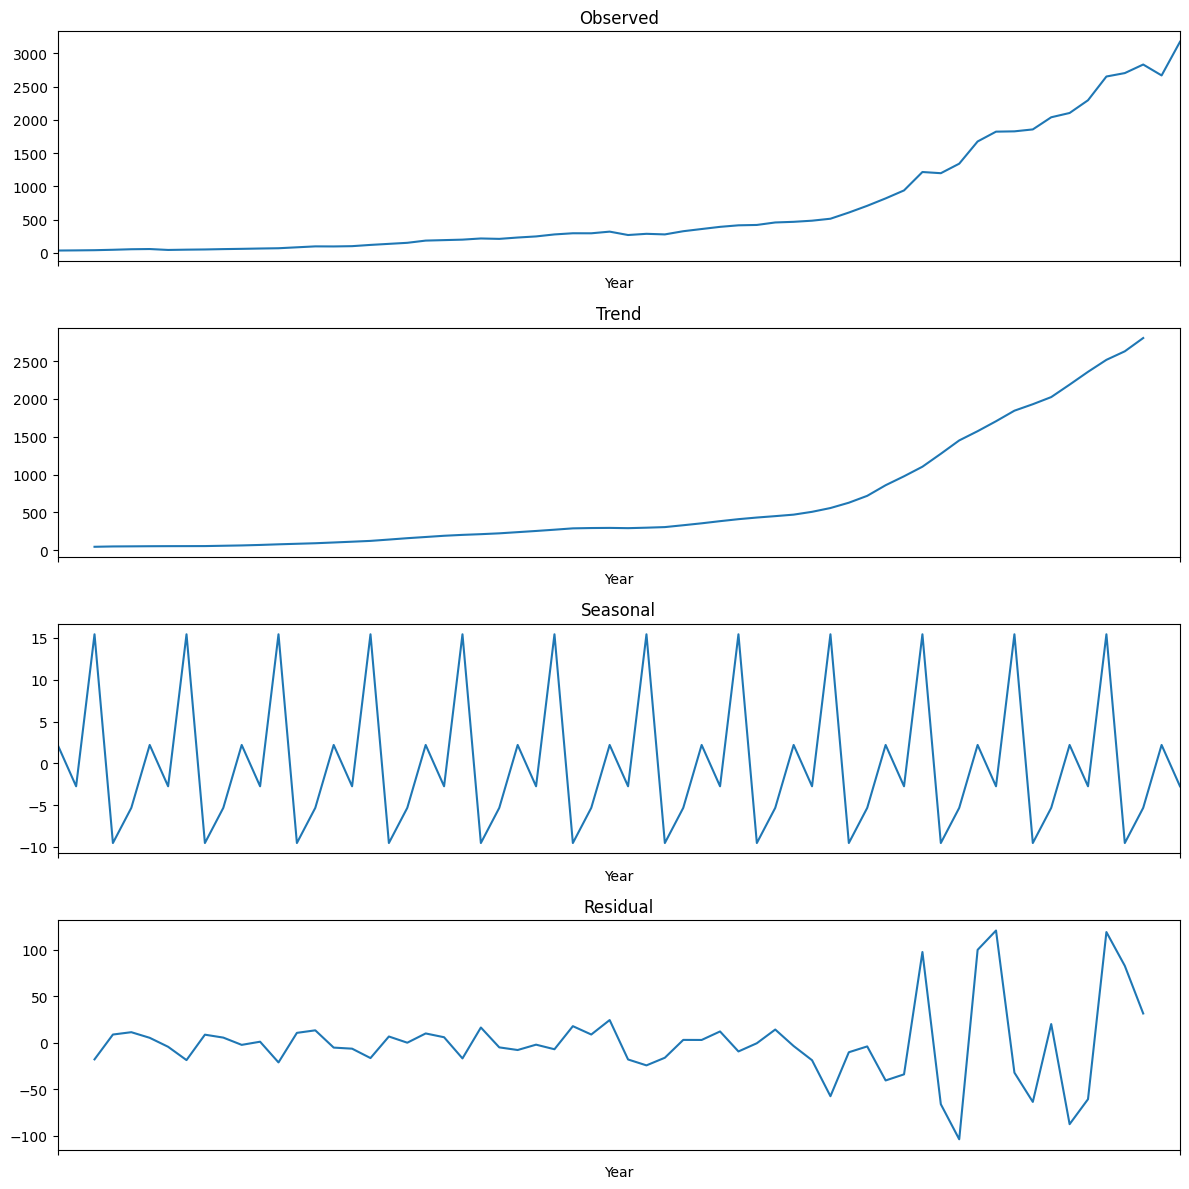

In [64]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns

#  Correlation Between GDP and Per Capita Income
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='GDP in (Billion)$', y='Per Capita in rupees') # Changed column name to match the global variables.
plt.title('Correlation Between GDP and Per Capita Income')
plt.xlabel('GDP in (Billion)$')
plt.ylabel('Per Capita in rupees')
plt.show()


# Decomposing the GDP time series
decompositions = seasonal_decompose(df['GDP in (Billion)$'], model='additive', period=5) # Changed column name to match the global variables.
fig, axes = plt.subplots(4, 1, figsize=(12, 12))
decompositions.observed.plot(ax=axes[0], title='Observed')
decompositions.trend.plot(ax=axes[1], title='Trend')
decompositions.seasonal.plot(ax=axes[2], title='Seasonal')
decompositions.resid.plot(ax=axes[3], title='Residual')
plt.tight_layout()
plt.show()

The trend component confirms steady growth, while seasonal variations are minimal.